

# Project: Investigate the FBI gud dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov.

The NICS data is found in one sheet of an .xlsx file. It contains the number of firearm checks by month, state, and type.

The U.S. census data is found in a .csv file. It contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year.

Questions: 

- What is the estimated number of civilians gun registration per capita by states in 2010 and 2016?
- Which countries have had the highest gun registration in  2010 and 2016? 
- What is the most purchased type of gun in 2017?

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
x = pd.ExcelFile('gun_data.xlsx')
x.sheet_names
[u'Sheet1']
g= x.parse("Sheet1")

c = pd.read_csv('U.S._Census_Data.csv')

### Data Cleaning (gun_data)

In [3]:
g.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4]:
g.shape

(12485, 27)

In [5]:
g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [6]:
g.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [7]:
g.columns.values

array(['month', 'state', 'permit', 'permit_recheck', 'handgun',
       'long_gun', 'other', 'multiple', 'admin', 'prepawn_handgun',
       'prepawn_long_gun', 'prepawn_other', 'redemption_handgun',
       'redemption_long_gun', 'redemption_other', 'returned_handgun',
       'returned_long_gun', 'returned_other', 'rentals_handgun',
       'rentals_long_gun', 'private_sale_handgun',
       'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'], dtype=object)

# I will merge gun_data and census_data after cleaning. 

In [8]:
#Drop all the variables that is not necessary 
g_droped = g.drop([ 'permit', 'permit_recheck', 'admin', 'prepawn_handgun',
       'prepawn_long_gun', 'prepawn_other', 'redemption_handgun',
       'redemption_long_gun', 'redemption_other', 'returned_handgun',
       'returned_long_gun', 'returned_other', 'rentals_handgun',
       'rentals_long_gun', 'private_sale_handgun',
       'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other'], axis = 1)

In [9]:
g_droped.head()

,month,state,handgun,long_gun,other,multiple,totals
0,2017-09,Alabama,5734.0,6320.0,221.0,317,32019
1,2017-09,Alaska,2320.0,2930.0,219.0,160,6303
2,2017-09,Arizona,11063.0,7946.0,920.0,631,28394
3,2017-09,Arkansas,4347.0,6063.0,165.0,366,17747
4,2017-09,California,37165.0,24581.0,2984.0,0,123506


In [10]:
g_droped['month'] = pd.to_datetime(g['month'])

In [11]:
g_droped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   month     12485 non-null  datetime64[ns]
 1   state     12485 non-null  object        
 2   handgun   12465 non-null  float64       
 3   long_gun  12466 non-null  float64       
 4   other     5500 non-null   float64       
 5   multiple  12485 non-null  int64         
 6   totals    12485 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 682.9+ KB


In [12]:
g_2010 = g_droped[g_droped['month'] == '2010-04-01']
g_2010.head()

,month,state,handgun,long_gun,other,multiple,totals
4895,2010-04-01,Alabama,8727.0,8095.0,131.0,394,20791
4896,2010-04-01,Alaska,2650.0,3136.0,64.0,135,6411
4897,2010-04-01,Arizona,7787.0,5097.0,198.0,309,16578
4898,2010-04-01,Arkansas,3865.0,3833.0,45.0,197,14563
4899,2010-04-01,California,26170.0,27650.0,0.0,0,80750


In [13]:
g_2010.describe()

,handgun,long_gun,other,multiple,totals
count,55.000000,55.000000,55.000000,55.000000,55.000000
mean,5715.018182,6352.181818,79.436364,280.345455,22304.727273
std,6786.885558,8017.274170,112.573887,482.648527,33409.700210
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1091.500000,2198.000000,0.000000,27.500000,4817.000000
50%,3865.000000,3824.000000,44.000000,148.000000,13373.000000
75%,7616.000000,8065.500000,107.500000,339.000000,25760.500000
max,26817.000000,49644.000000,595.000000,3208.000000,211261.000000


In [14]:
g_2016 = g_droped[g_droped['month'] == '2016-07-01' ]
g_2016.head()

,month,state,handgun,long_gun,other,multiple,totals
770,2016-07-01,Alabama,10132.0,7392.0,538.0,465,48927
771,2016-07-01,Alaska,2898.0,2816.0,239.0,165,6793
772,2016-07-01,Arizona,13693.0,8643.0,1283.0,642,34496
773,2016-07-01,Arkansas,6323.0,5053.0,325.0,367,19378
774,2016-07-01,California,46361.0,47594.0,17297.0,0,190218


In [15]:
g_2016.describe()

,handgun,long_gun,other,multiple,totals
count,55.000000,55.000000,55.000000,55.000000,55.000000
mean,11431.363636,8006.272727,969.709091,389.454545,39767.090909
std,13361.422119,8660.850774,2420.725860,544.260586,59962.202395
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2174.500000,2910.000000,110.500000,13.500000,7554.000000
50%,6323.000000,5134.000000,313.000000,203.000000,20480.000000
75%,14813.000000,11664.500000,1044.500000,499.500000,43848.500000
max,57902.000000,47594.000000,17297.000000,2698.000000,363085.000000


In [16]:
#merg 2010 and 2016 to 
merg_g = pd.concat([g_2010,g_2016 ], keys=['2010-04-01', '2016-07-01'], axis = 0)
merg_g.head()

month       state  handgun  long_gun  other  multiple  \
2010-04-01 4895 2010-04-01     Alabama   8727.0    8095.0  131.0       394   
           4896 2010-04-01      Alaska   2650.0    3136.0   64.0       135   
           4897 2010-04-01     Arizona   7787.0    5097.0  198.0       309   
           4898 2010-04-01    Arkansas   3865.0    3833.0   45.0       197   
           4899 2010-04-01  California  26170.0   27650.0    0.0         0   

                 totals  
2010-04-01 4895   20791  
           4896    6411  
           4897   16578  
           4898   14563  
           4899   80750

In [17]:
merg_g.reset_index(drop=True, inplace=True)

In [18]:
merg_g.head()

,month,state,handgun,long_gun,other,multiple,totals
0,2010-04-01,Alabama,8727.0,8095.0,131.0,394,20791
1,2010-04-01,Alaska,2650.0,3136.0,64.0,135,6411
2,2010-04-01,Arizona,7787.0,5097.0,198.0,309,16578
3,2010-04-01,Arkansas,3865.0,3833.0,45.0,197,14563
4,2010-04-01,California,26170.0,27650.0,0.0,0,80750


### Data Cleaning (census_data)

In [19]:
c.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [20]:
#Droppping all the columns that is not necessary
c = c.drop(c.index[65: 85]).reset_index()

In [21]:
#Droping the first column 'Fact Note'
c = c.drop(['Fact Note'], axis =1 )

In [22]:
# All the NAs become 0.0
c= c.fillna(0.0)

In [23]:
c.set_index('Fact',inplace=True)
c = c.T.reset_index()

In [24]:
#Rename index 
c.rename(columns={'index':'state'},inplace = True)

In [25]:
c.head()

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,index,0,1,2,3,4,5,6,7,8,...,55,56,57,58,59,60,61,62,63,64
1,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
2,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
3,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
4,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""


In [26]:
#Converting from object to float 
col = c.iloc[:,2:].columns
for i in col:
    c[i] = c[i].str.extract('(\d+)').astype(float)

In [27]:
# Create new tables c_16
c_16 = c[['state', 'Population estimates, July 1, 2016,  (V2016)']] 
c_16.head()

Fact,state,"Population estimates, July 1, 2016, (V2016)"
0,index,0
1,Alabama,"4,863,300"
2,Alaska,"741,894"
3,Arizona,"6,931,071"
4,Arkansas,"2,988,248"


In [28]:
c_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   state                                         51 non-null     object
 1   Population estimates, July 1, 2016,  (V2016)  51 non-null     object
dtypes: object(2)
memory usage: 944.0+ bytes


In [29]:
#Create a new table for c_10 
c_10 = c[['state','Population estimates base, April 1, 2010,  (V2016)']]
c_10.head()

Fact,state,"Population estimates base, April 1, 2010, (V2016)"
0,index,NaN
1,Alabama,4.0
2,Alaska,710.0
3,Arizona,6.0
4,Arkansas,2.0


In [30]:
c_16.reset_index(drop = True).head()

Fact,state,"Population estimates, July 1, 2016, (V2016)"
0,index,0
1,Alabama,"4,863,300"
2,Alaska,"741,894"
3,Arizona,"6,931,071"
4,Arkansas,"2,988,248"


In [31]:
c10 = c_10['Population estimates base, April 1, 2010,  (V2016)'].sum()
c10

76310694.0

### Data Cleaning (Merging census_data and gun_data)

In [32]:
#Display and plan to concat 
c_10.head()

Fact,state,"Population estimates base, April 1, 2010, (V2016)"
0,index,NaN
1,Alabama,4.0
2,Alaska,710.0
3,Arizona,6.0
4,Arkansas,2.0


In [33]:
#Display c_16 and reset it
c_16.reset_index(drop = True).head()

Fact,state,"Population estimates, July 1, 2016, (V2016)"
0,index,0
1,Alabama,"4,863,300"
2,Alaska,"741,894"
3,Arizona,"6,931,071"
4,Arkansas,"2,988,248"


In [34]:
#Display gun_2010 and reset it
g_2010= g_2010.reset_index(drop= True)
g_2010.head()

,month,state,handgun,long_gun,other,multiple,totals
0,2010-04-01,Alabama,8727.0,8095.0,131.0,394,20791
1,2010-04-01,Alaska,2650.0,3136.0,64.0,135,6411
2,2010-04-01,Arizona,7787.0,5097.0,198.0,309,16578
3,2010-04-01,Arkansas,3865.0,3833.0,45.0,197,14563
4,2010-04-01,California,26170.0,27650.0,0.0,0,80750


In [35]:
#Display g_2016 it and reset it
g_2016 = g_2016.reset_index(drop= True)
g_2016.head()

,month,state,handgun,long_gun,other,multiple,totals
0,2016-07-01,Alabama,10132.0,7392.0,538.0,465,48927
1,2016-07-01,Alaska,2898.0,2816.0,239.0,165,6793
2,2016-07-01,Arizona,13693.0,8643.0,1283.0,642,34496
3,2016-07-01,Arkansas,6323.0,5053.0,325.0,367,19378
4,2016-07-01,California,46361.0,47594.0,17297.0,0,190218


In [36]:
merg_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   month     110 non-null    datetime64[ns]
 1   state     110 non-null    object        
 2   handgun   110 non-null    float64       
 3   long_gun  110 non-null    float64       
 4   other     110 non-null    float64       
 5   multiple  110 non-null    int64         
 6   totals    110 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 6.1+ KB


<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1 (Gun per capita 2010-2016)

What is the estimated number of civilians gun registration per capita by states in 2010 and 2016?


In [37]:
#Merge census 2010 and 2016
census_diff = c_10.merge(c_16, on='state', how='left')
census_diff.head()

Fact,state,"Population estimates base, April 1, 2010, (V2016)","Population estimates, July 1, 2016, (V2016)"
0,index,NaN,0
1,Alabama,4.0,"4,863,300"
2,Alaska,710.0,"741,894"
3,Arizona,6.0,"6,931,071"
4,Arkansas,2.0,"2,988,248"


In [38]:
census_diff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   state                                               51 non-null     object 
 1   Population estimates base, April 1, 2010,  (V2016)  50 non-null     float64
 2   Population estimates, July 1, 2016,  (V2016)        51 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.6+ KB


In [39]:
# Convert into a percentage 
def percent(value):
    if value > 0.001:
        result = value *100
    return result 

In [40]:
#Merge 2010 and 2016
gun_diff = g_2010.merge(g_2016, on='state', how='left')
gun_diff.head() # ---> this will be used to find gun per capita

#month_x and totals_x come from g_2010
#month_y and totals_y come from g_2016

,month_x,state,handgun_x,long_gun_x,other_x,multiple_x,totals_x,month_y,handgun_y,long_gun_y,other_y,multiple_y,totals_y
0,2010-04-01,Alabama,8727.0,8095.0,131.0,394,20791,2016-07-01,10132.0,7392.0,538.0,465,48927
1,2010-04-01,Alaska,2650.0,3136.0,64.0,135,6411,2016-07-01,2898.0,2816.0,239.0,165,6793
2,2010-04-01,Arizona,7787.0,5097.0,198.0,309,16578,2016-07-01,13693.0,8643.0,1283.0,642,34496
3,2010-04-01,Arkansas,3865.0,3833.0,45.0,197,14563,2016-07-01,6323.0,5053.0,325.0,367,19378
4,2010-04-01,California,26170.0,27650.0,0.0,0,80750,2016-07-01,46361.0,47594.0,17297.0,0,190218


In [41]:
# Checking gun per capita in 2010
capita_2010 = gun_diff['totals_x'].sum()/census_diff['Population estimates base, April 1, 2010,  (V2016)'].sum()
capita_2010

0.016075859564322663

In [42]:
#Convert to percentage
percent(capita_2010)

1.6075859564322663

In [53]:
census_diff['Population estimates, July 1, 2016,  (V2016)'] = pd.to_numeric(census_diff['Population estimates, July 1, 2016,  (V2016)'], errors='coerce')

In [54]:
# Checking out gun per capita 2016

capita_2016 = (gun_diff['totals_y'].sum())/census_diff['Population estimates, July 1, 2016,  (V2016)'].sum()
capita_2016

0.027798246188529985

In [55]:
#Convert to percentage
percent(capita_2016)

2.7798246188529987

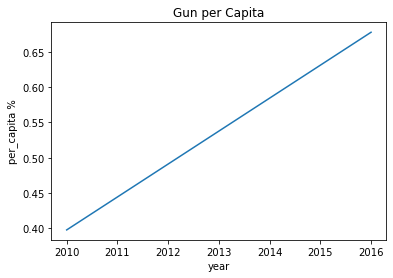

In [56]:
# Check out the chart Per capita 

year = [2010, 2016]
per_capita = [0.39781331523550745, 0.67779340497762697]

plt.title('Gun per Capita')
plt.xlabel('year')
plt.ylabel('per_capita %')
plt.plot(year, per_capita)
plt.show()


##### Answers :

- Gun per capita in 2010 is 0.39781327392522886 %.

- Gun per capita in 2016 is 0.67779340497762697 %. 


### Research Question 2 (High gun by states in 2010 ,2016 and 2017)

Which countries have had the highest gun registration in  2010, 2016, and 2017? 

In [57]:
# merge census_diff and gun_diff 
gun_usa = census_diff.merge(gun_diff, on='state', how='left')
gun_usa.head()
#month_x and totals_x 

,state,"Population estimates base, April 1, 2010, (V2016)","Population estimates, July 1, 2016, (V2016)",month_x,handgun_x,long_gun_x,other_x,multiple_x,totals_x,month_y,handgun_y,long_gun_y,other_y,multiple_y,totals_y
0,index,NaN,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,Alabama,4.0,NaN,2010-04-01,8727.0,8095.0,131.0,394.0,20791.0,2016-07-01,10132.0,7392.0,538.0,465.0,48927.0
2,Alaska,710.0,NaN,2010-04-01,2650.0,3136.0,64.0,135.0,6411.0,2016-07-01,2898.0,2816.0,239.0,165.0,6793.0
3,Arizona,6.0,NaN,2010-04-01,7787.0,5097.0,198.0,309.0,16578.0,2016-07-01,13693.0,8643.0,1283.0,642.0,34496.0
4,Arkansas,2.0,NaN,2010-04-01,3865.0,3833.0,45.0,197.0,14563.0,2016-07-01,6323.0,5053.0,325.0,367.0,19378.0


In [58]:
gun_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   state                                               51 non-null     object        
 1   Population estimates base, April 1, 2010,  (V2016)  50 non-null     float64       
 2   Population estimates, July 1, 2016,  (V2016)        13 non-null     float64       
 3   month_x                                             50 non-null     datetime64[ns]
 4   handgun_x                                           50 non-null     float64       
 5   long_gun_x                                          50 non-null     float64       
 6   other_x                                             50 non-null     float64       
 7   multiple_x                                          50 non-null     float64       
 8   totals_x    

In [59]:
#Make a new table for  2017 
g_017 = g[g['month'] == '2017-09' ]
g_017.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [60]:
g_017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 54
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      55 non-null     object 
 1   state                      55 non-null     object 
 2   permit                     55 non-null     float64
 3   permit_recheck             55 non-null     float64
 4   handgun                    55 non-null     float64
 5   long_gun                   55 non-null     float64
 6   other                      55 non-null     float64
 7   multiple                   55 non-null     int64  
 8   admin                      55 non-null     float64
 9   prepawn_handgun            55 non-null     float64
 10  prepawn_long_gun           55 non-null     float64
 11  prepawn_other              55 non-null     float64
 12  redemption_handgun         55 non-null     float64
 13  redemption_long_gun        55 non-null     float64
 

In [61]:
#Sort it in the opposite direction 
g_017.sort_values(by=['totals'], axis = 0, ascending = False).head(10)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
18,2017-09,Kentucky,378384.0,0.0,8112.0,7543.0,253.0,543,1.0,16.0,...,0.0,0.0,0.0,21.0,19.0,1.0,2.0,1.0,0.0,398706
46,2017-09,Texas,31390.0,0.0,39119.0,39416.0,2768.0,2473,0.0,59.0,...,0.0,0.0,0.0,121.0,87.0,13.0,2.0,5.0,0.0,128260
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
14,2017-09,Illinois,15712.0,71432.0,18290.0,10201.0,0.0,814,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116449
9,2017-09,Florida,10784.0,0.0,39199.0,17949.0,2319.0,1721,1.0,18.0,...,0.0,0.0,0.0,11.0,9.0,0.0,0.0,1.0,0.0,77390
40,2017-09,Pennsylvania,23144.0,0.0,39825.0,13222.0,48.0,0,179.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77003
45,2017-09,Tennessee,16887.0,0.0,19219.0,13746.0,1042.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50945
37,2017-09,Ohio,8741.0,490.0,21085.0,14998.0,1202.0,1026,0.0,9.0,...,0.0,0.0,0.0,58.0,36.0,4.0,1.0,1.0,0.0,49942
15,2017-09,Indiana,18241.0,0.0,16093.0,11332.0,1123.0,597,79.0,5.0,...,0.0,0.0,0.0,75.0,57.0,6.0,4.0,4.0,0.0,48524
25,2017-09,Minnesota,25645.0,0.0,4862.0,12677.0,346.0,273,0.0,1.0,...,1.0,0.0,0.0,13.0,16.0,0.0,0.0,1.0,1.0,44552


List of 10 high gun by states in 2017
1. Kentucky
2. Texas
3. California
4. Illinois
5. Florida
6. Pennsylvania 
7. Tennessee
8. Ohio
9. Indianna
10. Minnesota 

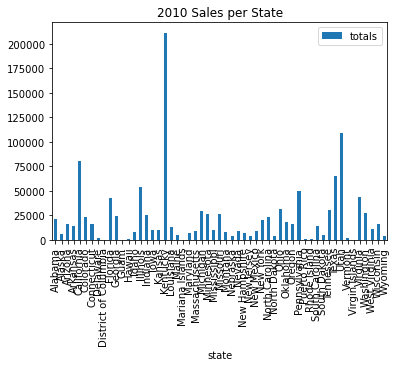

In [87]:
# plot 2010 
g_2010.plot(x='state', y='totals', kind='bar', title='2010 Sales per State'); #Compare t0 2017

In [63]:
#List 10 states with high gun in 2010
g_2010.sort_values(by=['totals'], axis = 0, ascending = False).head(10)

,month,state,handgun,long_gun,other,multiple,totals
18,2010-04-01,Kentucky,6274.0,6352.0,104.0,440,211261
47,2010-04-01,Utah,2379.0,2996.0,0.0,143,109391
4,2010-04-01,California,26170.0,27650.0,0.0,0,80750
46,2010-04-01,Texas,24481.0,21343.0,595.0,1232,65012
14,2010-04-01,Illinois,8557.0,8005.0,0.0,463,53929
40,2010-04-01,Pennsylvania,1.0,49644.0,0.0,393,50249
50,2010-04-01,Virginia,25259.0,18158.0,0.0,720,44137
9,2010-04-01,Florida,26817.0,12952.0,0.0,1207,42794
37,2010-04-01,Ohio,17333.0,11342.0,329.0,635,31312
45,2010-04-01,Tennessee,12533.0,8066.0,0.0,463,30453


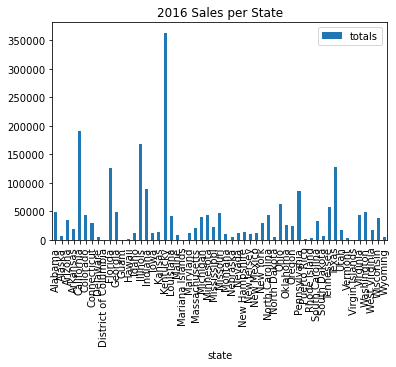

In [88]:
g_2016.plot(x='state', y='totals', kind='bar',title='2016 Sales per State'); #Compare to 017

In [65]:
#high gun by state in 2016
g_2016.sort_values(by=['totals'], axis = 0, ascending = False).head(10)

,month,state,handgun,long_gun,other,multiple,totals
18,2016-07-01,Kentucky,9378.0,6615.0,321.0,534,363085
4,2016-07-01,California,46361.0,47594.0,17297.0,0,190218
14,2016-07-01,Illinois,21421.0,11881.0,0.0,881,168227
46,2016-07-01,Texas,50499.0,34266.0,4046.0,2698,127207
9,2016-07-01,Florida,57902.0,28000.0,4504.0,2324,125208
15,2016-07-01,Indiana,19508.0,12191.0,1600.0,644,88340
40,2016-07-01,Pennsylvania,46843.0,11793.0,19.0,0,86137
37,2016-07-01,Ohio,27876.0,17720.0,2166.0,1232,63148
45,2016-07-01,Tennessee,26276.0,16118.0,0.0,1374,57653
10,2016-07-01,Georgia,15342.0,8597.0,635.0,632,49183


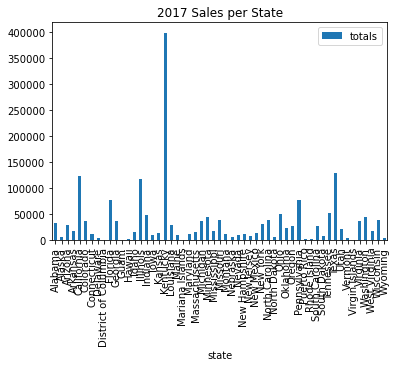

In [89]:
g_017.plot(x='state', y='totals', kind='bar',title='2017 Sales per State');

#### Answers:

##### Highest gun registration in 2010 by states:
	- Kentucky	
	- Utah	
	- California	
	- Texas	
	- Illinois	
	- Pennsylvania	
	- Virginia	
	- Florida	
	- Ohio	
	- Tennessee	

##### Highest gun registration in 2016 by states:
	- Kentucky	
	- California	
	- Illinois	
	- Texas	
	- Florida	
	- Indiana
	- Pennsylvania	
	- Ohio	
	- Tennessee	
    - Georgia	

##### List of 10 high gun by states in 2017
    - Kentucky
    - Texas
    - California
    - Illinois
    - Florida
    - Pennsylvania
    - Tennessee
    - Ohio
    - Indianna
    - Minnesota


### Research Question 3 (Gun Trend)

What is the most purchased type of gun in 2017?

In [67]:
#Display g_017
g_017.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [68]:
#Trendy Gun bought (other, mutiple, handgun_long_gun)

gun = ['handgun', 'long_gun', 'other', 'multiple']
purchases = [477315, 417126,26897,17612]

In [69]:
yman = np.arange(len(gun))
yman

array([0, 1, 2, 3])

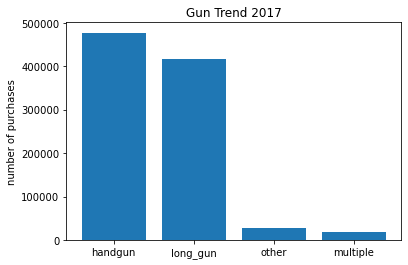

In [83]:
plt.xticks(yman, gun)
plt.ylabel('number of purchases')
plt.title('Gun Trend 2017')
plt.bar(yman, purchases )
plt.show()

In [71]:
#Checking the differences

In [72]:
g_017['handgun'].sum()

478082.0

In [73]:
g_017['long_gun'].sum()

417305.0

In [74]:
g_017['other'].sum()

26924.0

In [75]:
g_017['multiple'].sum()

17638

##### Answers:

##### Most purchased gun in 2017
1. Handgun
2. Longun
3. other
4. mutiple

<a id='conclusions'></a>
## Conclusion

In this project, it was concluded that the sales of the handguns were the best in the year 2017, followed by longuns, others. while people who purchased multiple guns were the least bought in that year.

I was able to draw these conclusions based on the data given to me after clearing, wrangling, and exploring this dataset. Although these data contained a lot of missing data, it was an easy task to cleanse it. However, the main problem was that most of the census data frame series were objects, not floats. It was kinda complicated to find a solution to this problem. but, eventually, it was overcomed.

Another problem that I faced, was determining what exactly that I wanted to achieve using this dataset. It wasn't clear how should I proceed with the questions that I have. However, this data was sufficient to draw all the conclusions, and analyses that I wanted.